In [30]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [12]:
img_array = cv2.imread("Training/6/Training_1009179.jpg")

In [13]:
img_array.shape

(48, 48, 3)

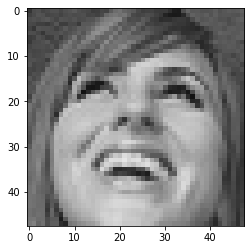

In [14]:
plt.imshow(img_array)

In [15]:
Datadirectory="Training/" # training dataset

In [16]:
Classes=["0","1","2","3","4","5","6"] # list of classes => Extract name of my folder

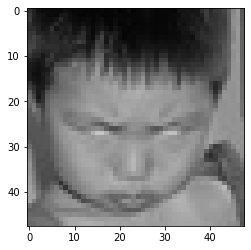

In [17]:
# Read & Show all images 
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

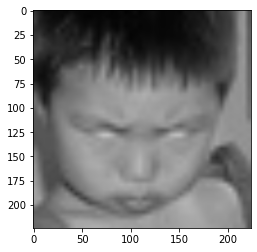

In [18]:
img_size = 224 # ImageNet => 224 x 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
new_array.shape

(224, 224, 3)

# Read all the images and coverting them to array

In [20]:
training_Data=[] # Data Array 
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category) 
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try: 
                img_array=cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [21]:
create_training_Data()

In [22]:
print(len(training_Data)) 

28709


In [23]:
temp = np.array(training_Data)

<ipython-input-23-b8d83967cc6f>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp = np.array(training_Data)


In [24]:
temp.shape

(28709, 2)

In [25]:
import random
random.shuffle(training_Data)

In [26]:
X=[] ## data / feature
y=[] ## label e.g. 0,1,2,3,4,5,6
for features, label in training_Data:
    X.append(features)
    y.append(label)
X= np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4 D

In [28]:
X

array([[[[118, 118, 118],
         [118, 118, 118],
         [117, 117, 117],
         ...,
         [109, 109, 109],
         [109, 109, 109],
         [109, 109, 109]],

        [[118, 118, 118],
         [118, 118, 118],
         [117, 117, 117],
         ...,
         [109, 109, 109],
         [109, 109, 109],
         [109, 109, 109]],

        [[117, 117, 117],
         [117, 117, 117],
         [116, 116, 116],
         ...,
         [109, 109, 109],
         [108, 108, 108],
         [108, 108, 108]],

        ...,

        [[108, 108, 108],
         [108, 108, 108],
         [112, 112, 112],
         ...,
         [218, 218, 218],
         [218, 218, 218],
         [218, 218, 218]],

        [[105, 105, 105],
         [105, 105, 105],
         [109, 109, 109],
         ...,
         [218, 218, 218],
         [218, 218, 218],
         [218, 218, 218]],

        [[105, 105, 105],
         [105, 105, 105],
         [108, 108, 108],
         ...,
         [218, 218, 218],
        

In [29]:
# normalize the data
for i in range(0,22000):
    X[i] = X[i]/255.0 

In [30]:
X

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [31]:
y[120]

5

In [32]:
Y=np.array(y)

In [33]:
Y.shape

(28709,)

# deep learning model for training - tranfer learning

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model = tf.keras.applications.MobileNetV2() # Pre-trained model

In [36]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

# Transfer learning - tuning, weights will start from last check point

In [37]:
base_input = model.layers[0].input # Input

In [38]:
base_output = model.layers[-2].output

In [39]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [40]:
final_output = layers.Dense(128)(base_output) # adding new layer after the oitput of global pooling layer
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [41]:
final_output # Output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [42]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [43]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [44]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [45]:
new_model.fit(X, Y, epochs = 5)

Epoch 1/5
898/898 [==============================] - 4842s 5s/step - loss: 1.8195 - accuracy: 0.2521
Epoch 2/5
898/898 [==============================] - 4819s 5s/step - loss: 1.7434 - accuracy: 0.2875
Epoch 3/5
898/898 [==============================] - 4819s 5s/step - loss: 1.7166 - accuracy: 0.2960
Epoch 4/5
898/898 [==============================] - 4817s 5s/step - loss: 1.7148 - accuracy: 0.2945
Epoch 5/5
898/898 [==============================] - 4819s 5s/step - loss: 1.6976 - accuracy: 0.3067


In [46]:
new_model.save('Final_model_95p07.h5')

In [1]:
from keras.models import load_model

from keras.preprocessing.image import img_to_array

import cv2
import numpy as np

In [2]:
new_model = load_model('Emotion_Detection.h5')

In [3]:
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

In [4]:
cap = cv2.VideoCapture(0)

In [5]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [6]:
while True:
    # Grab a single frame of video
    ret, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)


        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

        # make a prediction on the ROI, then lookup the class

            preds = classifier.predict(roi)[0]
            print("\nprediction = ",preds)
            label=class_labels[preds.argmax()]
            print("\nprediction max = ",preds.argmax())
            print("\nlabel = ",label)
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        print("\n\n")
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [7]:
frame = cv2.imread('Test/5.jpg')

In [8]:
frame.shape

(1024, 1024, 3)

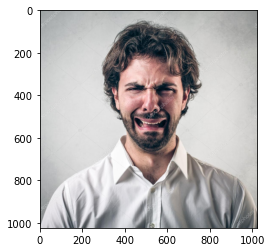

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# We need a face detection

In [25]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [26]:
gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [27]:
gray.shape
gray = np.array(gray, dtype='uint8')

In [40]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for x,y,w,h in faces:
    roi_gray = gray[y: y+h, x:x+w]
    roi_color = frame[y: y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0 ,0), 2) # BGR
    facess= face_cascade.detectMultiScale(roi_gray)
    if len(facess) ==  0:
        print ('Face Found')
    else: 
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]
    

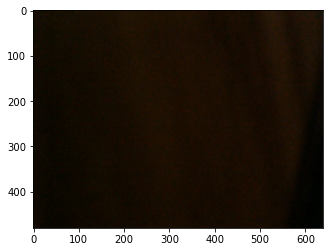

In [41]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [32]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

NameError: name 'face_roi' is not defined

In [33]:
final_image = cv2.resize(face_roi, (224,224)) # 4D
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0 # Normalize

NameError: name 'face_roi' is not defined

In [34]:
Predictions= new_model.predict(final_image)

NameError: name 'final_image' is not defined

In [35]:
Predictions[0]

NameError: name 'Predictions' is not defined

In [36]:
np.argmax(Predictions) # Show the number of the predicted label

NameError: name 'Predictions' is not defined

In [37]:
import cv2
import numpy as np
path ='haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr= (255,255,255)
img = np.zeros((500,500))
text='some text in the box'
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords =((text_offset_x,text_offset_y),(text_offset_x + text_width +2,text_offset_y + text_height -2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font, fontScale=font_scale, color=(0,0,0),thickness=1)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap =cv2.VideoCapture(0)
    
if not cap.isOpened():
    raise IOError('Cannot Open Camera')

while True:
    ret, frame =cap.read()
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for x,y,w,h in faces:
        roi_gray = gray[y: y+h, x:x+w]
        roi_color = frame[y: y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0 ,0), 2) # BGR
        facess= face_cascade.detectMultiScale(roi_gray)
        if len(facess) ==  0:
            print ('Face not Found')
        else: 
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew]
                
    final_image = cv2.resize(face_roi, (224,224)) # 4D
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0 # Normalize
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions= new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    if(np.argmax(Predictions)==0):
        status = 'Angry'
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1+y1,h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==1):
        status = 'Disgust'
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1+y1,h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==2):
        status = 'Fear'
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1+y1,h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==3):
        status = 'Happy'
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1+y1,h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==4):
        status = 'Sad'
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1+y1,h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==5):
        status = 'Surprise'
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1+y1,h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))  
    else:
        status = 'Neutral'
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1+y1,h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    cv2.imshow('Face Emotion Recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    

NameError: name 'face_roi' is not defined

In [24]:
import datetime;
ts= datetime.datetime.now().timestamp()
print(ts)

1623185565.048222


In [36]:
import pymysql

#database connection
connection = pymysql.connect(host="localhost",user="root",passwd="",database="facialemotion" )
cursor = connection.cursor()
# some other statements  with the help of cursor
#connection.close()

InternalError: Packet sequence number wrong - got 1 expected 0

In [35]:
import datetime;
ts= datetime.datetime.now().timestamp()
#insert1 = "INSERT INTO timestamp(timestamp,emotion) VALUES( "ts" ,'happy');"
#cursor.execute(insert1)
cursor.execute("INSERT INTO timestamp VALUES (timestamp, emotion)", (1623185565.048222, 'happy'))
connection.commit()
connection.close()


TypeError: not all arguments converted during string formatting